App user segmentation is the task of grouping users based on how they engage with the app. It helps find retained users, find the user segment for a marketing campaign, and solve many other business problems where you need to search for users based on similar characteristics.

In [14]:
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
import pandas as pd
pio.renderers.default='notebook'
pio.templates.default = "plotly_white"



In [15]:
data = pd.read_csv(r"C:\Users\prash\Desktop\Job\Resume Projects\AppUserSegmentation\user-behaviour\user behaviour\userbehaviour.csv")
print(data.head())

   userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
0    1001                 17.0                       634.0            1   
1    1002                  0.0                        54.0            0   
2    1003                 37.0                       207.0            0   
3    1004                 32.0                       445.0            1   
4    1005                 45.0                       427.0            1   

   Ratings  New Password Request  Last Visited Minutes       Status  
0        9                     7                  2990    Installed  
1        4                     8                 24008  Uninstalled  
2        8                     5                   971    Installed  
3        6                     2                   799    Installed  
4        5                     6                  3668    Installed  


Let’s start by looking at the highest, lowest, and average screen time of all the users:

In [16]:
print(f'Average Screen Time = {data["Average Screen Time"].mean()}')
print(f'Highest Screen Time = {data["Average Screen Time"].max()}')
print(f'Lowest Screen Time = {data["Average Screen Time"].min()}')

Average Screen Time = 24.39039039039039
Highest Screen Time = 50.0
Lowest Screen Time = 0.0


Now let’s have a look at the highest, lowest, and the average amount spent by all the users:

In [17]:
print(f'Average Spend of the Users = {data["Average Spent on App (INR)"].mean()}')
print(f'Highest Spend of the Users = {data["Average Spent on App (INR)"].max()}')
print(f'Lowest Spend of the Users = {data["Average Spent on App (INR)"].min()}')

Average Spend of the Users = 424.4154154154154
Highest Spend of the Users = 998.0
Lowest Spend of the Users = 0.0


let’s have a look at the relationship between the spending capacity and screen time of the active users and the users who have uninstalled the app:

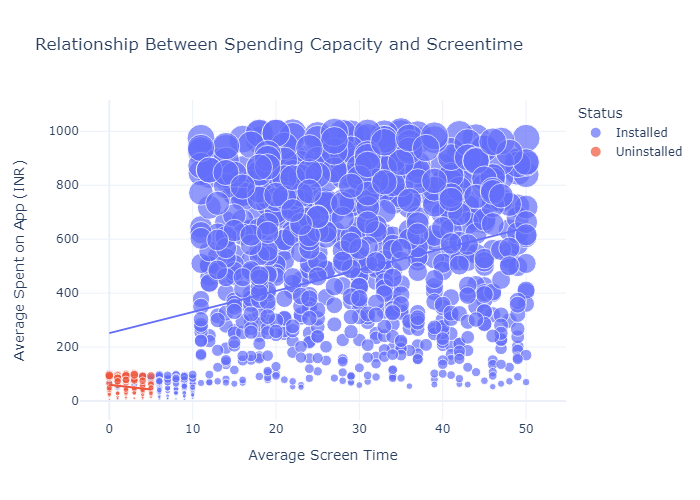

In [18]:
figure = px.scatter(data_frame = data, 
                    x="Average Screen Time",
                    y="Average Spent on App (INR)", 
                    size="Average Spent on App (INR)", 
                    color= "Status",
                    title = "Relationship Between Spending Capacity and Screentime",
                    trendline="ols")
figure.show('png')

Users who uninstalled the app had an average screen time of fewer than 5 minutes a day, and the average spent was less than 100. We can also see a linear relationship between the average screen time and the average spending of the users still using the app.

Now let’s have a look at the relationship between the ratings given by users and the average screen time:

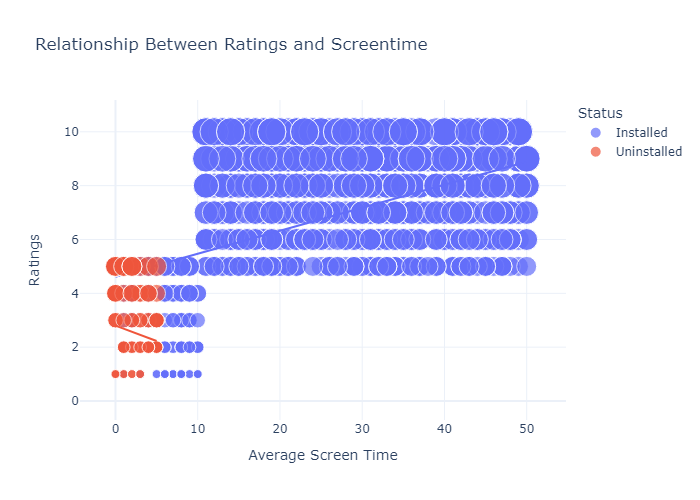

In [19]:
figure = px.scatter(data_frame = data, 
                    x="Average Screen Time",
                    y="Ratings", 
                    size="Ratings", 
                    color= "Status", 
                    title = "Relationship Between Ratings and Screentime",
                    trendline="ols")
figure.show('png')

we can see that users who uninstalled the app gave the app a maximum of five ratings. Their screen time is very low compared to users who rated more. So, this describes that users who don’t like to spend more time rate the app low and uninstall it at some point.

App User Segmentation to Find Retained and Lost Users

will be using the K-means clustering algorithm in Machine Learning for this task:

In [20]:
clustering_data = data[["Average Screen Time", "Left Review", 
                        "Ratings", "Last Visited Minutes", 
                        "Average Spent on App (INR)", 
                        "New Password Request"]]

from sklearn.preprocessing import MinMaxScaler
for i in clustering_data.columns:
    MinMaxScaler(i)
    
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(clustering_data)
data["Segments"] = clusters

data.head(10)

C:\Users\prash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Segments
0,1001,17.0,634.0,1,9,7,2990,Installed,0
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,2
2,1003,37.0,207.0,0,8,5,971,Installed,0
3,1004,32.0,445.0,1,6,2,799,Installed,0
4,1005,45.0,427.0,1,5,6,3668,Installed,0
5,1006,28.0,599.0,0,9,4,2878,Installed,0
6,1007,49.0,887.0,1,9,6,4481,Installed,0
7,1008,8.0,31.0,0,2,1,1715,Installed,0
8,1009,28.0,741.0,1,8,2,801,Installed,0
9,1010,28.0,524.0,1,8,4,4621,Installed,0


In [21]:
import sklearn
print(sklearn.show_versions())


System:
    python: 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\prash\anaconda3\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
      sklearn: 1.1.3
          pip: 22.3.1
   setuptools: 65.6.3
        numpy: 1.24.2
        scipy: 1.10.0
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.7.0
       joblib: 1.1.1
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: C:\Users\prash\AppData\Roaming\Python\Python310\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
        version: 0.3.21
threading_layer: pthreads
   architecture: SkylakeX
    num_threads: 8

       user_api: blas
   internal_api: mkl
         prefix: mkl_rt
       filepath: C:\Users\prash\anaconda3\Library\bin\mkl_rt.1.dll
        version: 2021.4-Product
threading_layer: intel
    num_threads: 4

     

let’s have a look at the number of segments we got:

In [22]:
print(data["Segments"].value_counts())

0    910
1     45
2     44
Name: Segments, dtype: int64


let’s rename the segments for a better understanding:

In [23]:
data["Segments"] = data["Segments"].map({0: "Retained", 1: 
    "Churn", 2: "Needs Attention"})

let’s visualize the segments:

In [36]:
PLOT = go.Figure()

for i in list(data["Segments"].unique()):
    

    PLOT.add_trace(go.Scatter(x = data[data["Segments"]== i]['Last Visited Minutes'],
                                y = data[data["Segments"] == i]['Average Spent on App (INR)'],
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Last Visited Minutes: %{x} <br>Average Spent on App (INR): %{y}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   yaxis_title = 'Average Spent on App (INR)',
                   xaxis_title = 'Last Visited Minutes',
                   scene = dict(xaxis=dict(title = 'Last Visited Minutes', titlefont_color = 'black'),
                                yaxis=dict(title = 'Average Spent on App (INR)', titlefont_color = 'black')))

PLOT
#PLOT.write_image(r"C:\Users\prash\Desktop\Job\Resume Projects\AppUserSegmentation\user-behaviour\user behaviour\image.png")

The blue segment shows the segment of users the app has retained over time. The red segment indicates the segment of users who just uninstalled the app or are about to uninstall it soon. And the green segment indicates the segment of users that the application has lost.

Summary
So this is how we can segment users based on how they engage with the app. App users segmentation helps businesses find retained users, find the user segment for a marketing campaign, and solve many other business problems where you need to search for users based on similar characteristics.